# Avacado Project

## 1.Data analysis

(i) Import Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

(2) Data loading and cleaning

In [65]:
df=pd.read_csv(r"C:\Users\Hi\Downloads\avocado.csv\avocado.csv")

In [66]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [67]:
# removing unnecessary column
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [68]:
df.shape

(18249, 13)

#### About Features


Date - the date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Our task is to predict the Average Price.

In [69]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [70]:
# Check Null Values

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Inference= there is no null values

### Describing Datasets

In [71]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [73]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [74]:
df['Date']

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

In [75]:
# new data frame with split value columns
new = df["Date"].str.split("-", n = 1, expand = True)


df["Year"]= new[0]

df["Month"]= new[1]
#df["year"]= new[2]

new2 = df["Month"].str.split("-", n = 1, expand = True)

df["Month"]= new2[0]
df["Date"]= new2[1]

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
3,06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,02
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,01
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,01
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,01


In [76]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['year']=df['year'].astype(int)

# 2.EDA

Portland               338
LosAngeles             338
RichmondNorfolk        338
Northeast              338
Pittsburgh             338
Jacksonville           338
Nashville              338
Midsouth               338
SouthCarolina          338
Boston                 338
BaltimoreWashington    338
PhoenixTucson          338
Columbus               338
Seattle                338
BuffaloRochester       338
SanFrancisco           338
SouthCentral           338
Roanoke                338
Boise                  338
California             338
Charlotte              338
Louisville             338
DallasFtWorth          338
Chicago                338
GrandRapids            338
Spokane                338
Orlando                338
Indianapolis           338
CincinnatiDayton       338
TotalUS                338
NorthernNewEngland     338
NewYork                338
NewOrleansMobile       338
RaleighGreensboro      338
Detroit                338
Denver                 338
HarrisburgScranton     338
T

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

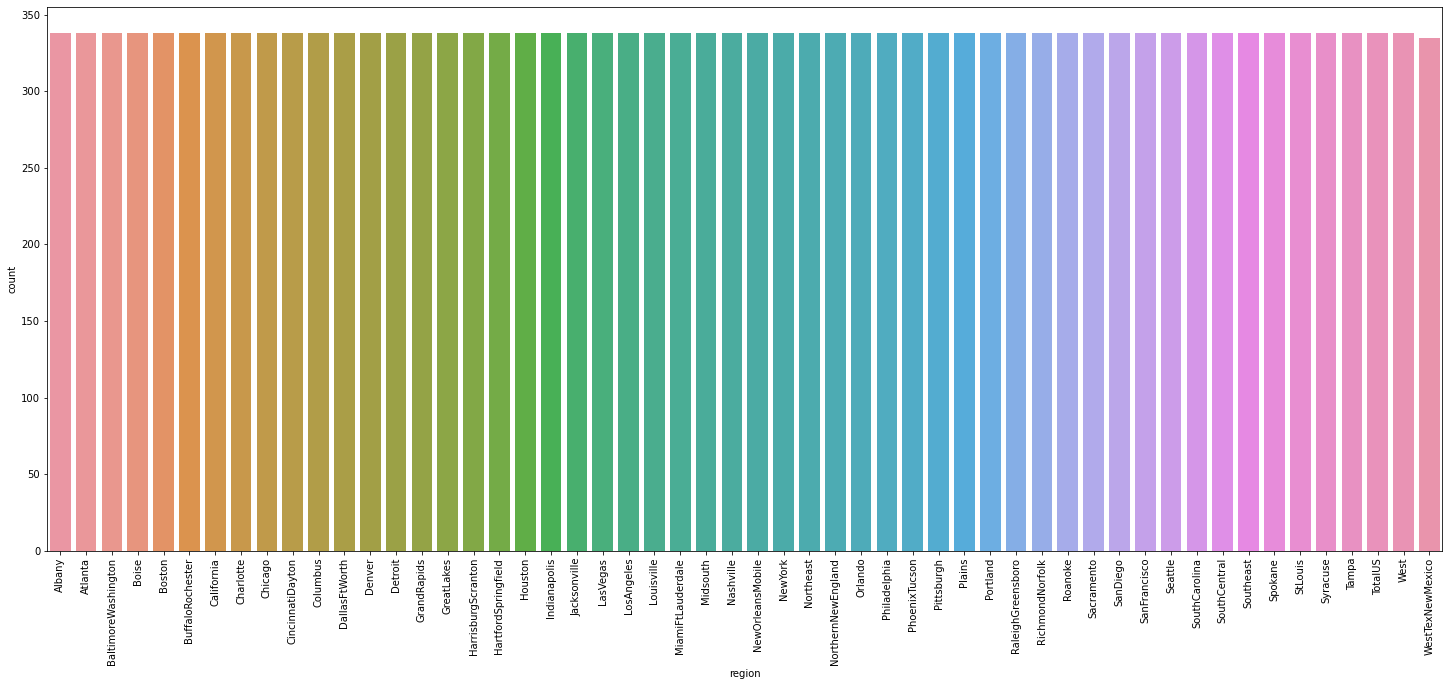

In [77]:
print(df['region'].value_counts())
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)

In [78]:
print(df['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

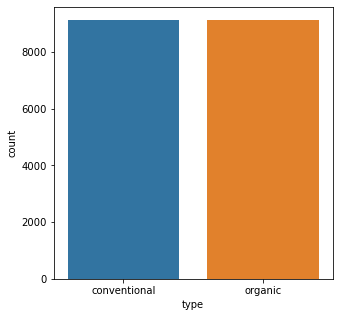

In [79]:
plt.figure(figsize=(5,5))
sns.countplot(df['type'])


There is equal distribution of conventional and organic avacado types

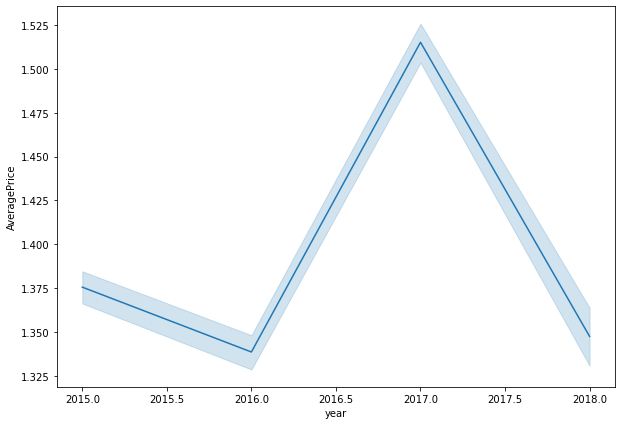

In [80]:
plt.figure(figsize=(10,7))
sns.lineplot(x='year', y='AveragePrice', data=df)
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

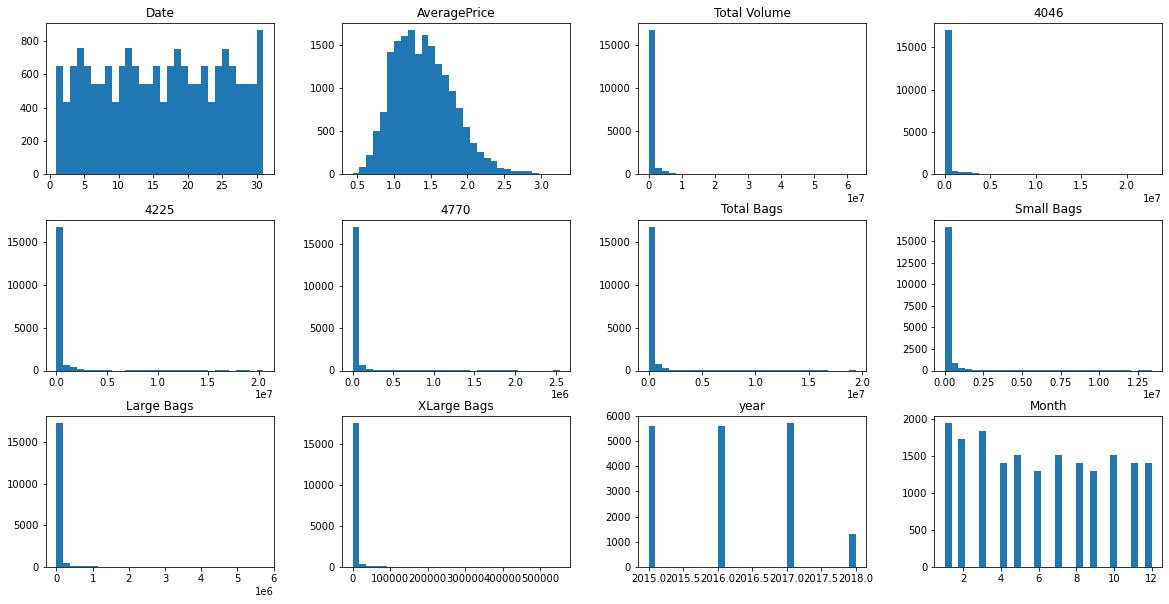

In [81]:
df.hist(figsize=(20,10), grid=False, layout=(3, 4), bins = 30)

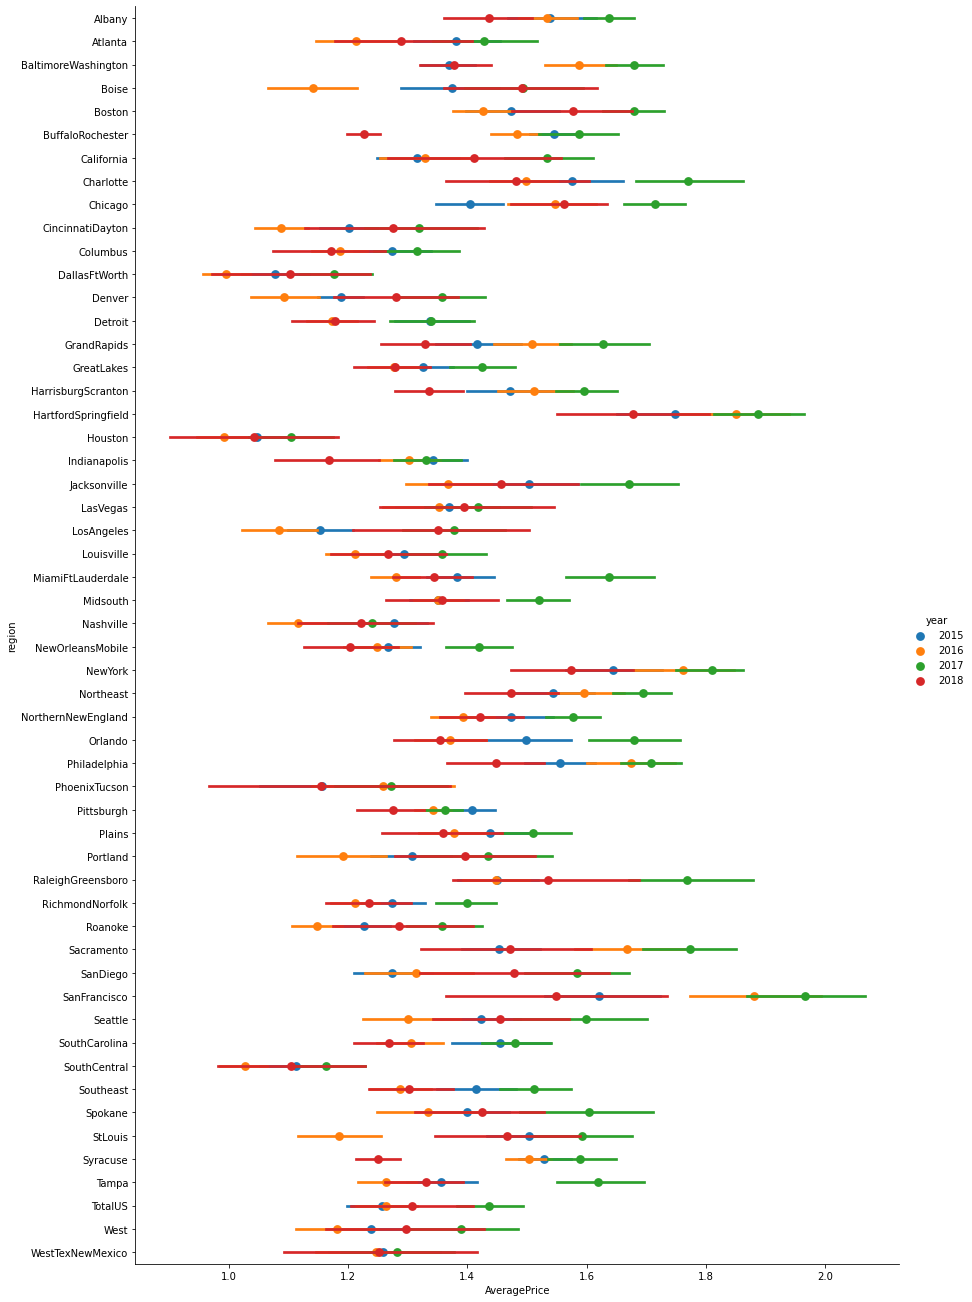

In [82]:
# Factorplot Display distribution of data across all level of category
sns.factorplot('AveragePrice','region',hue='year',data=df,size=18,aspect=0.7,join=False)

In [83]:
df_continuous=df.drop(columns='region')
df_catogorical=df['region']

<AxesSubplot:xlabel='Date', ylabel='count'>

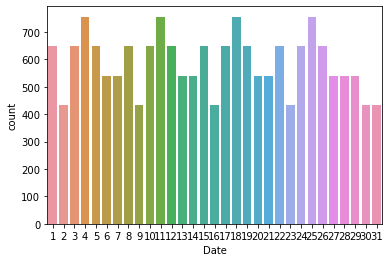

In [84]:
sns.countplot(df_continuous['Date'])

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

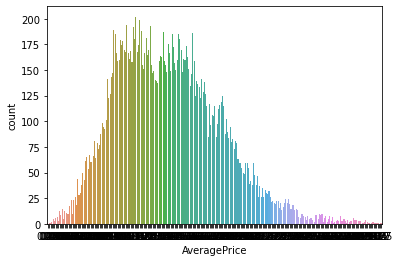

In [85]:
sns.countplot(df_continuous['AveragePrice'])


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

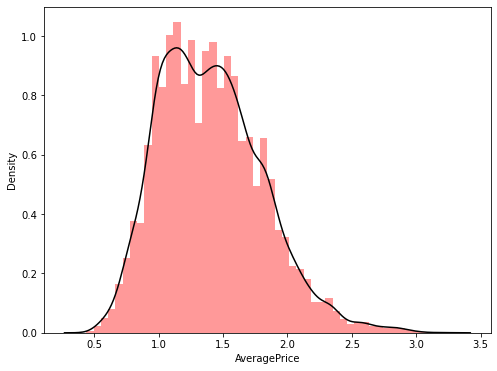

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(df['AveragePrice'],color='r', kde_kws={"color": "k"})


AVERAGE PRICE-Target variable in normally distributed but  slight skewedness at right

<AxesSubplot:xlabel='Month', ylabel='count'>

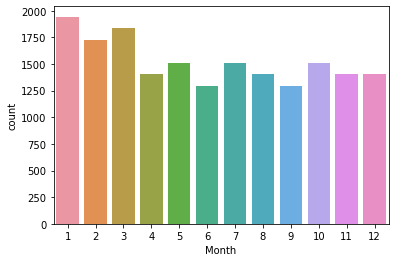

In [87]:
sns.countplot(x='Month',data=df_continuous)

ALL THE MONTHS ARE EQUALLY DISTRIBUTED i.e THERE IS NO SEASON FOR AVACADO SALES

TypeError: Horizontal orientation requires numeric `x` variable.

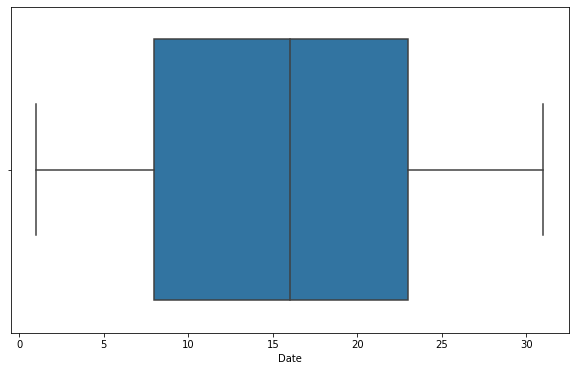

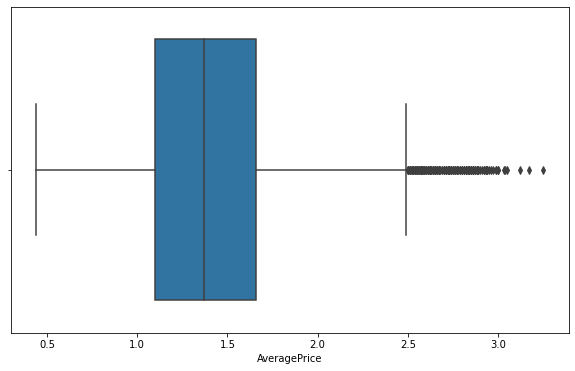

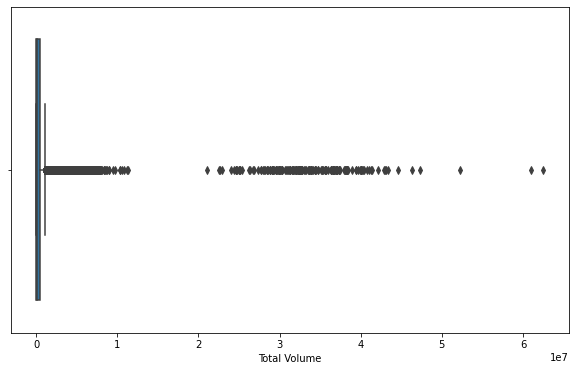

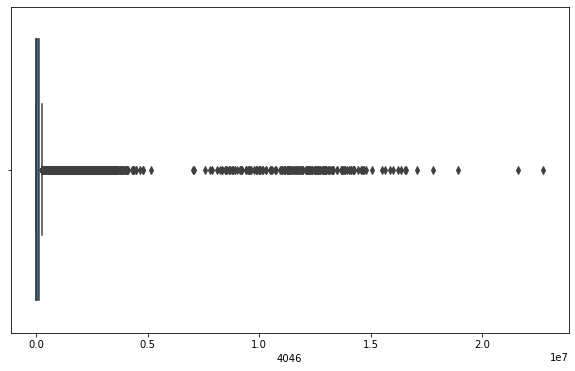

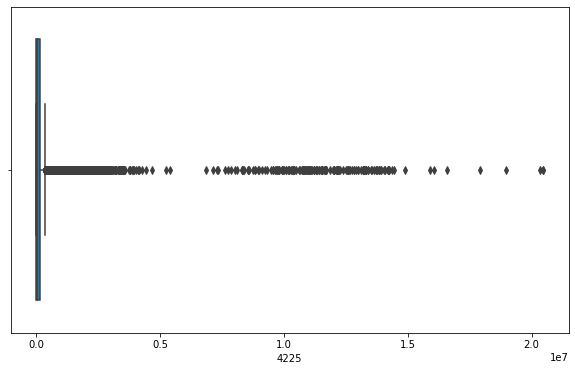

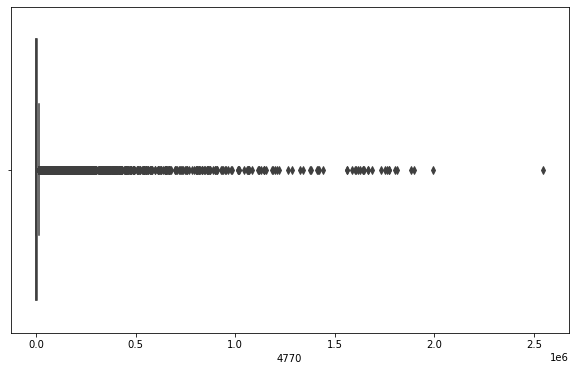

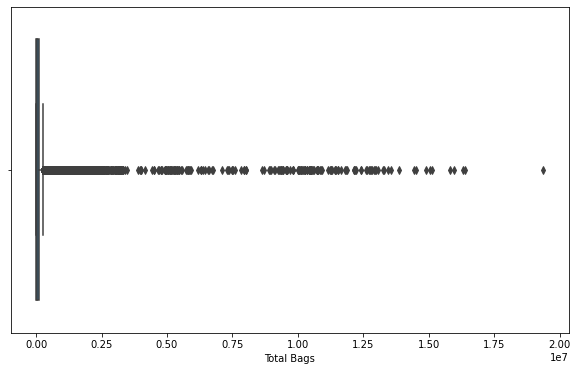

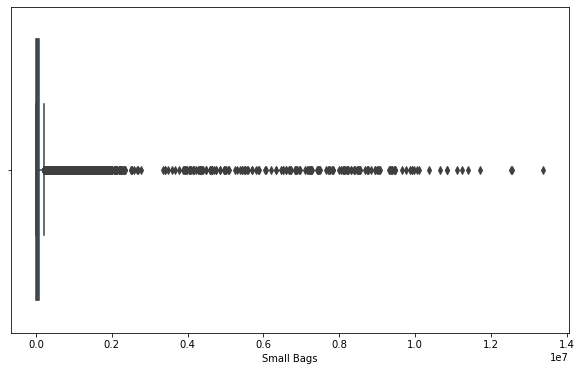

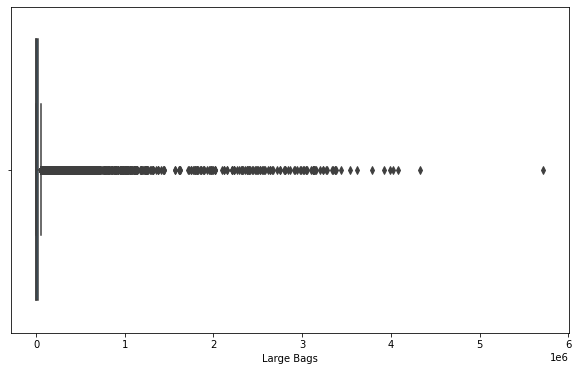

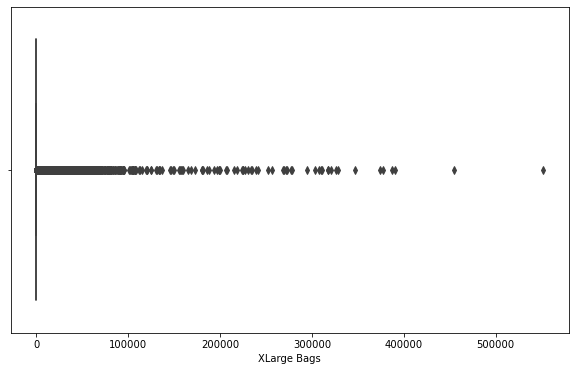

<Figure size 720x432 with 0 Axes>

In [88]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[i])

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

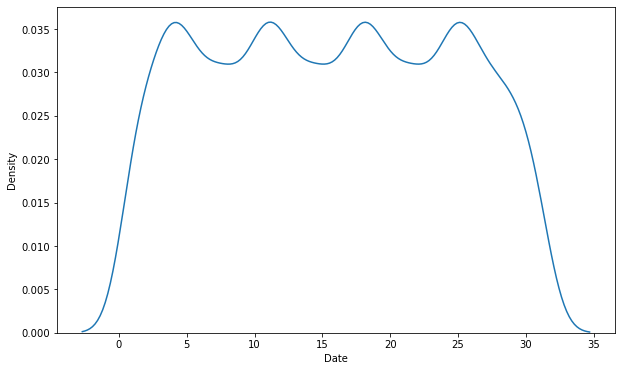

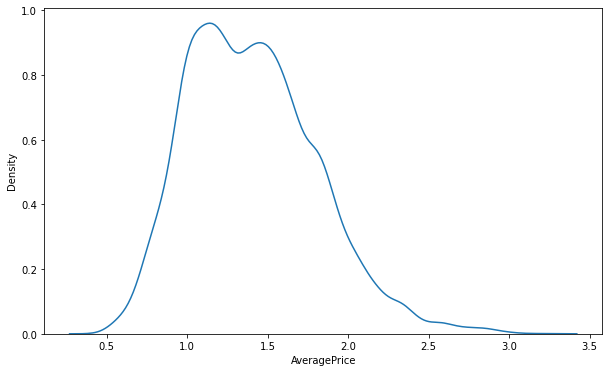

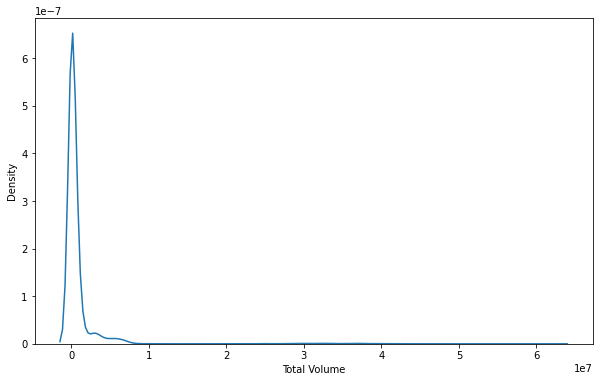

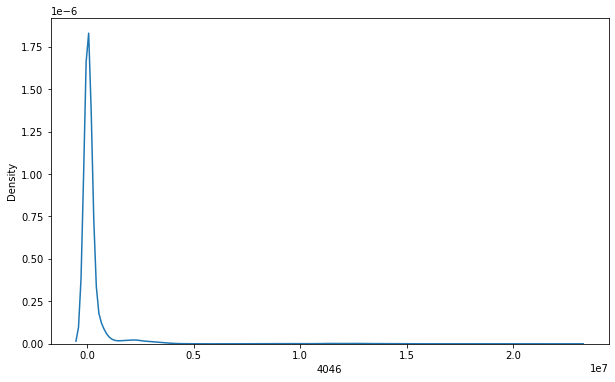

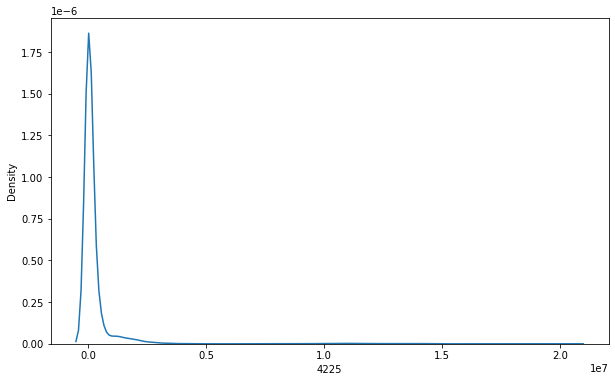

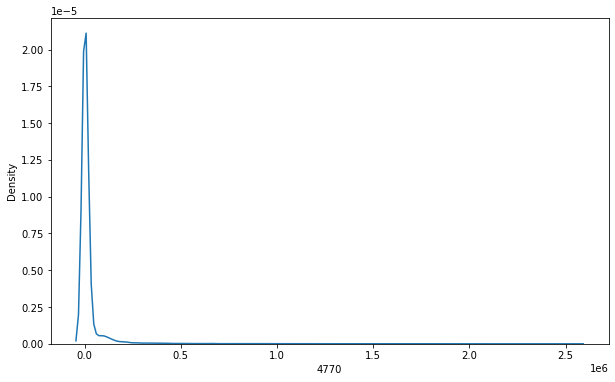

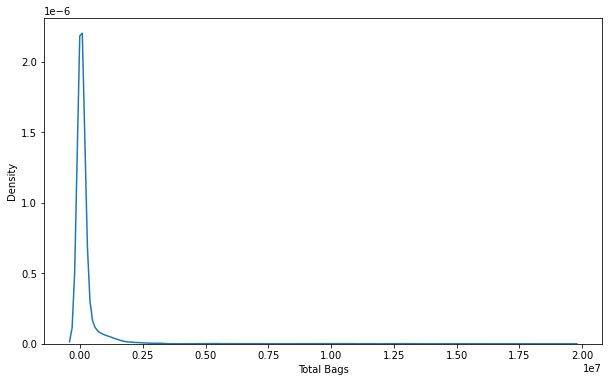

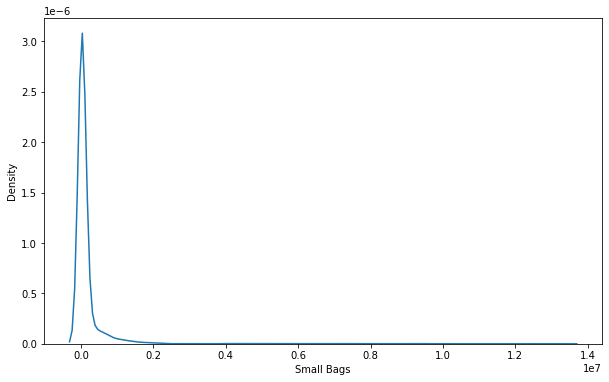

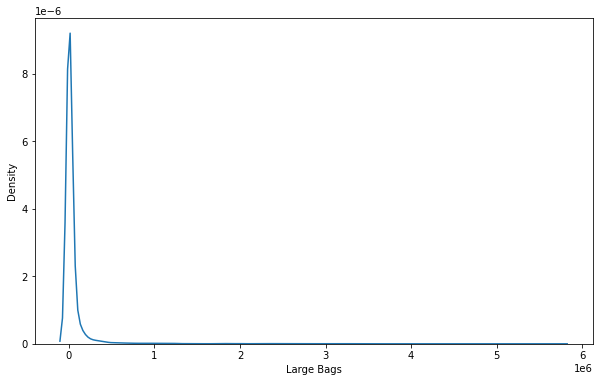

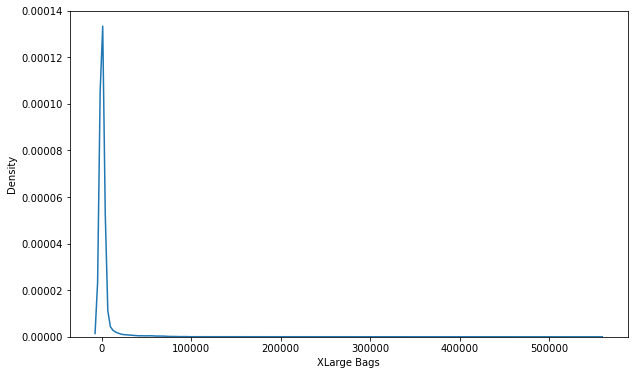

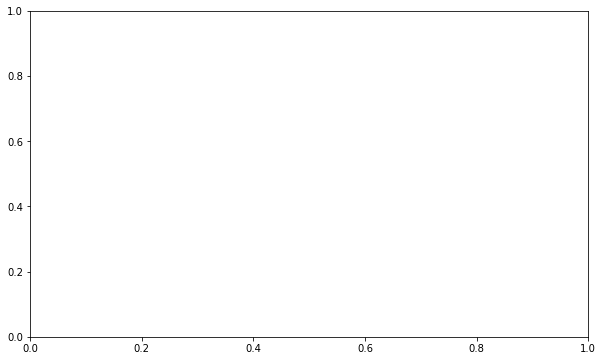

In [89]:
for i in df_continuous.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df_continuous[i])
